In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import cv2

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AvgPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

## Load Data , test and train

In [3]:

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:

Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

print("shape Train features :", np.shape(X_train))
print("shape Train Targets  :", np.shape(X_train))

shape Train features : (42000, 28, 28, 1)
shape Train Targets  : (42000, 28, 28, 1)


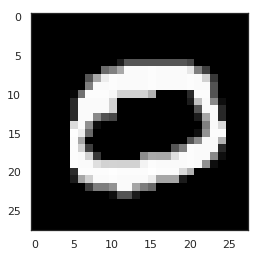

In [17]:
image = test[1].reshape((28,28))

plt.imshow(image, 'gray')

cv2.imwrite()

In [0]:
# to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [0]:

random_seed = 46
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.001, random_state=random_seed)

In [0]:
np.shape(X_train)

(70, 28, 28, 1)

## Model Construction : 

In [0]:

input_shape = (28,28,1)
def Build_Model(): 

    model = Sequential()
    # 1 conv Layer
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',  activation ='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    # 2 conv Layer
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(AvgPool2D(pool_size=(2,2)))
    # 3 #  conv Layer
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    # 4 # First conv Layer
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',  activation ='relu'))
    model.add(BatchNormalization())
    model.add(AvgPool2D(pool_size=(2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(256*6, activation = "relu"))
    model.add(Dropout(0.25))
    model.add(Dense(256*3, activation = "relu"))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation = "softmax"))

    # Compile model
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



    return model




In [0]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

## Data augmentation : 

In [0]:
# data augmentation 
datagen = ImageDataGenerator(featurewise_center=False,  
                            samplewise_center=False,
                            featurewise_std_normalization=False,    
                            samplewise_std_normalization=False,
                            zca_whitening=False,  
                            rotation_range=10, 
                            zoom_range = 0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False)


datagen.fit(X_train)

## Traing off the model : 

In [ ]:
# Train
batch_size = 100
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size), epochs = 250, 
                              validation_data = (X_test,y_test),steps_per_epoch=X_train.shape[0] // batch_size, 
                              callbacks=[learning_rate_reduction])

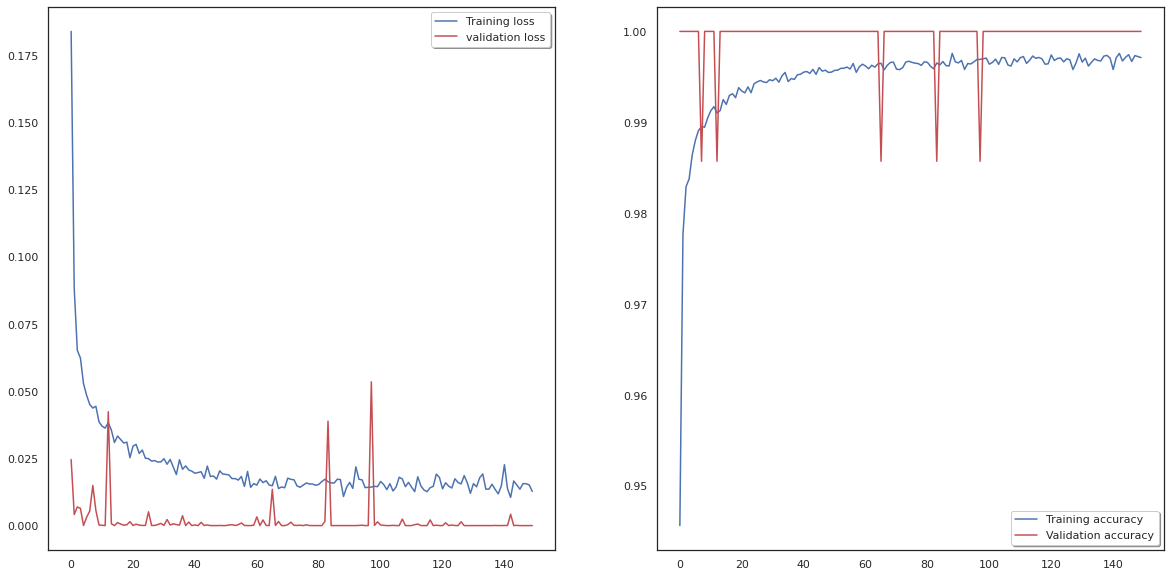

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1 )
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.legend(loc='best', shadow=True)

plt.subplot(1,2,2 )
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc='best', shadow=True)

## prediction and save prediction file

In [0]:
# 
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [0]:
# file to save and submit to kaggle.
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen_avgPooling_150Epochs.csv",index=False)

## Load Model and predict : 

In [ ]:
json_file = open(list_models_model4[i]+".json", 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights(list_models_model4[i]+".h5")
print("model LOADED")
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Make predictions : 
y = model.predict(test)
y_predictions = np.argmax(y, axis = 1)


In [ ]:

data = {'y_Actual':    Targets,
        'y_Predicted':y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)



plt.figure(figsize=(25,25))
sns.heatmap(confusion_matrix, annot=True)
plt.show()